# Einleitung: Der k-NN Klassifikator

Die seltsame Bezeichnung *k-NN Klassifikator* steht für *k-Nearest Neighbours*. Die Idee ist denkbar einfach:

Wenn ich eine neue Eingabe x habe, schaue einfach in den Beispieldaten nach den *k* ähnlichsten Beispielen und betrachte zu welchen Klassen diese gehören:

Zum Beispiel könnte als Ergebnis für *k=3* herauskommen:
- das ähnlichste Beispiel zu x hat die Klasse A
- das zweit-ähnlichste Beispiel zu x hat die Klasse B
- das dritt-ähnlichste Beispiel zu x hat die Klasse A

Dann wäre es sinnvoll, die neue Eingabe x vielleicht auch als "A" zu klassifizieren, da ja zwei der Beispiele zu "A" gehören und nur eines zur Klasse "B".

Und wenn das rauskommt?
- das ähnlichste Beispiel zu x hat die Klasse A
- das zweit-ähnlichste Beispiel zu x hat die Klasse B
- das dritt-ähnlichste Beispiel zu x hat die Klasse C

Wenn es hier keine Mehrheit gibt, könnte man sich an der Klasse des ähnlichsten Beispiels orientieren: x wird zu "A" klassifiziert.

Und jetzt noch ein interessanter Fall:
- das ähnlichste Beispiel zu x hat die Klasse A
- das zweit-ähnlichste Beispiel zu x hat die Klasse B
- das dritt-ähnlichste Beispiel zu x hat die Klasse B

Hier würde der *k-NN Klassifikator* wieder einen Mehrheitsentscheid vorziehen: x wird zu "B" klassifiziert.

Prinzipiell betrachtet die Standardvariante des *NN Klassifikators* eine feste Anzahl *k* von Nachbarn, aber man könnte auch anders vorgehen: betrachte alle Nachbarn um x innerhalb eines festen Radius *r*. Dann könnte es z.B. mal nur ein Nachbar sein oder aber auch 139 Nachbarn. Auf Basis dieser Menge von Nachbarn kann man dann wieder einen Mehrheitsentscheid hinsichtlich der Klasse für x machen. Diese Variante wird dann nahliegenderweise *radius-basierter NN Klassifikator* genannt.

Man merkt: hier kann man schnell auf neue Ideen kommen, wie man die Klassifikationsentscheidung eines *NN Klassifikators* noch verfeinern könnte. Wir könnten zum Beispiel auch die Klassen der identifizierten Nachbarn noch gewichten:

- ein Nachbar, der weit weg von x ist, erhält ein kleines Gewicht
- ein Nachbar, der nahe an x liegt, erhält ein großes Gewicht

Generell handelt es sich um ein sogenanntes *lazy learning*, denn die Beispieldaten werden hier ja nur abgespeichert, um später zu einer Klassifikationsentscheidung zu kommen. Man nennt so ein Verfahren im Machine Learning dann auch *nicht generalisierend*, denn die Beispieldaten werden nicht verwendet, um generelle Zusammenhänge zu erkennen, sondern dienen später lediglich als Vergleichsbasis, wenn neue Daten reinkommen und klassifiziert werden sollen.

Die Vorteile dieses Ansatzes sind:
- einfache Implementierung / Umsetzung in Code
- gute Nachvollziehbarkeit
- wenige Hyperparameter, die einzustellen sind, z.B. nur den Wert *k* oder *r* (bei einem radius-basierten NN Klassifikator)

# Ein einfaches Beispiel

Sagen wir mal unsere Beispieldaten sind zwei-dimensionale Punkte:

In [ ]:
data_points = [ [0,0], [5,5], [-5,5], [10,10] ]
data_classes = [ 3, 0, 1, 2 ]

In [ ]:
print(data_points)
print(data_classes)

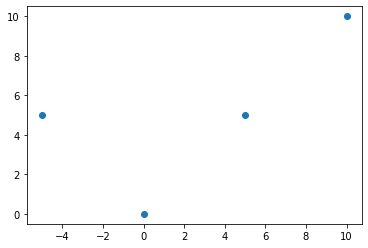

In [3]:
from matplotlib import pyplot as plt

xcoords = [p[0] for p in data_points]
ycoords = [p[1] for p in data_points]

plt.scatter(xcoords, ycoords)
plt.show()

Jetzt bauen wir uns mit scikit-learn einen *k-NN Klassifikator*:

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, weights="distance")
knn = knn.fit(data_points, data_classes)

Jetzt definieren wir mal zwei neue Punkte p1,p2:

In [5]:
p1 = [ 0.3, 0.3 ]
p2 = [ 4.0, 4.0 ]

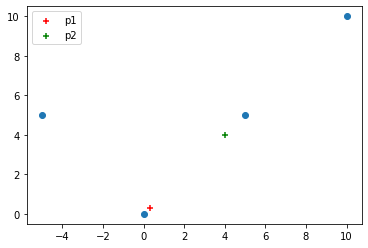

In [6]:
from matplotlib import pyplot as plt

plt.scatter(xcoords, ycoords)
plt.scatter(p1[0], p1[1], marker="+", color="red", label="p1")
plt.scatter(p2[0], p2[1], marker="+", color="green", label="p2")
plt.legend()
plt.show()

Und lassen diese Punkte durch den k-NN Klassifikator gleich klassifizieren:

In [7]:
knn.predict( [p1, p2] )

array([3, 0])

Man sieht, dass der Punkt p1 der Klasse 3 zugeordnet wird und der Punkt p2 der Klasse 0.

Wir können uns statt einer *harten* Entscheidung für nur eine Klasse auch Wahrscheinlichkeiten für die 4 Klassen 0,1,2,3 wünschen:

In [8]:
print("W'keiten für Klasse [0,1,2,3]")
knn.predict_proba( [ p1, p2 ] )

W'keiten für Klasse [0,1,2,3]


array([[0.05680211, 0.05329813, 0.        , 0.88989975],
       [0.70588235, 0.        , 0.11764706, 0.17647059]])

Man kann sich auch für jeden Punkt ausgeben lassen, wie die Distanzen zu den anderen Punkten sind:

In [9]:
from sklearn.neighbors import kneighbors_graph

A = kneighbors_graph(data_points, n_neighbors=4, mode='distance', include_self=True)

A.toarray()

array([[ 0.        ,  7.07106781,  7.07106781, 14.14213562],
       [ 7.07106781,  0.        , 10.        ,  7.07106781],
       [ 7.07106781, 10.        ,  0.        , 15.8113883 ],
       [14.14213562,  7.07106781, 15.8113883 ,  0.        ]])

Eine Alternative des `kneighbors_graph` ist es nicht die Distanzen zu anderen Punkten zu berechnen, sondern für jeden Punkt anzugeben, welche anderen Punkte zu den nächsten *k* Nachbarn gehören:

In [10]:
B = kneighbors_graph(data_points, n_neighbors=2, mode='connectivity', include_self=False)

B.toarray()

array([[0., 1., 1., 0.],
       [1., 0., 0., 1.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.]])

Man sieht z.B. das für den ersten Punkt (0,0) von `data_points`:

In [11]:
data_points

[[0, 0], [5, 5], [-5, 5], [10, 10]]

die Punkte (5,5) und (-5,5) die nächsten *k=2* Nachbarn sind.

# k-NN Klassifikator für den Titanic-Datensatz

Wir werden jetzt einen *k-NN Klassifikator* für den Titanic-Datensatz vorbereiten.

Dazu lesen wir mittels Pandas zuerst die Tabelle mit den Beispielpassagierdaten ein und bereiten eine kleine Tabelle mit ausgewählten Spalten vor:

In [12]:
import pandas as pd

fname = "daten/01_titanic/train.csv"
df_train = pd.read_csv( fname )
df_train_small = df_train[ ["Age", "Pclass", "Sex", "Survived"] ]
df_train_small_onehot = pd.get_dummies(df_train_small, columns=["Sex"])
df_train_small_onehot_nanfiltered = df_train_small_onehot.dropna()
df_train_small_onehot_nanfiltered

,Age,Pclass,Survived,Sex_female,Sex_male
0,22.0,3,0,0,1
1,38.0,1,1,1,0
2,26.0,3,1,1,0
3,35.0,1,1,1,0
4,35.0,3,0,0,1
...,...,...,...,...,...
885,39.0,3,0,1,0
886,27.0,2,0,0,1
887,19.0,1,1,1,0
889,26.0,1,1,0,1


Jetzt splitten wir diese 714 Beispielpassagiere in 80% Trainings- und 20% Testdaten:

In [13]:
x = df_train_small_onehot_nanfiltered[ ["Age", "Pclass", "Sex_female", "Sex_male"] ].values
y = df_train_small_onehot_nanfiltered[ "Survived" ].values


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)

In [14]:
print(x_train.shape, y_train.shape)

(571, 4) (571,)


In [15]:
x_train

array([[ 0.43405504, -0.28256564,  1.31743394, -1.31743394],
       [-0.32371271, -0.28256564, -0.75905134,  0.75905134],
       [ 0.36516706, -0.28256564, -0.75905134,  0.75905134],
       ...,
       [ 1.12293481, -1.47636364, -0.75905134,  0.75905134],
       [-0.25482473,  0.91123237, -0.75905134,  0.75905134],
       [ 1.05404683, -1.47636364,  1.31743394, -1.31743394]])

In [16]:
print(x_test.shape, y_test.shape)

(143, 4) (143,)


In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn2 = KNeighborsClassifier(n_neighbors=2, weights="distance")

knn2 = knn2.fit(x_train, y_train)

In [18]:
y_pred_test = knn2.predict( x_test )
y_pred_test

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [19]:
y_test

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1])

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_test)

0.8111888111888111

D.h., dass der *k-NN Klassifikator* für 81% der Testpassagiere korrekt vorhersagen kann, ob sie überlebt haben oder nicht.

# Metriken gibt es viele

Der *k-NN Klassifiaktor* betracht als Grundlage für seine Klassifikationsentscheidung die *k* nächsten Nachbarn. Dabei wird also irgendein Distanzmaß, eine *Metrik*, vorausgesetzt, um die nächsten *k* Nachbarn zu bestimmen.

Die Standardmetrik, die eingestellt ist, ist die sog. *Minkowski-Metrik*, siehe

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric

D.h., Sie können auch gerne einmal andere Metriken versuchen, um bessere Ergebnisse zu erzielen, z.B. die *euklidische Metrik* oder Sie können sogar eine eigene Funktion zur Berechnung der Distanz zwischen zwei Punkten spezifizieren:

In [21]:
from sklearn.neighbors import KNeighborsClassifier

def mydist(x,y):
    return 0.0*abs(x[0]-y[0]) + 1.0*abs(x[1]-y[1]) + 1.0*abs(x[2]-y[2])

knn3 = KNeighborsClassifier(n_neighbors=1, weights="distance", metric=mydist)

knn3 = knn3.fit(x_train, y_train)

In [22]:
y_pred_test = knn3.predict( x_test )
y_pred_test

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

In [23]:
y_test

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1])

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_test)

0.7132867132867133